# AIN 212 Project

Bengü Barış Balkan - 2200765011

Furkan Özyurt - 2200765018

In this project, we take the Life Expectancy data collected by WHO(World Health Organization) from kaggle and wanted to classify if a country is developed or developing by looking its health statistics.

Kaggle link of the data = https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

Drive link of the data = https://drive.google.com/file/d/12KWQUL-uP7rQPLtrnDHH3XfWuHYeRUZE/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://drive.google.com/file/d/12KWQUL-uP7rQPLtrnDHH3XfWuHYeRUZE/view?usp=sharing"
gdown.download(url=url, fuzzy=True)
data = pd.read_csv("Life Expectancy Data.csv")
data.head(20)

Downloading...
From: https://drive.google.com/uc?id=12KWQUL-uP7rQPLtrnDHH3XfWuHYeRUZE
To: C:\Users\bbbal\ain212\lecture project\Life Expectancy Data.csv
100%|███████████████████████████████████████████████████████████████████████████████| 330k/330k [00:00<00:00, 2.19MB/s]


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


We have our data here. We wanted to see all columns.

In [3]:
for col in data.columns:
    print(col)

Country
Year
Status
Life expectancy
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles
BMI
under-five deaths
Polio
Total expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness 10-19 years
thinness 5-9 years
Income composition of resources
Schooling


## Preprocessing and Cleaning

In [4]:
data.drop("Country",axis=1, inplace=True)
data.drop("Year",axis=1, inplace=True)

We analyzed the data and did not find a use for country and year fields. So we dropped them.

In [5]:
data["Status"].replace(["Developing","Developed"],[0,1],inplace=True)

In [6]:
for col in data.columns :
    data[col] = data[col].astype(float)

Then we tried to reach unit unification by converting binary categorical values to 1-0 and converting all numerical values to floats.

In [7]:
print(data.isnull().sum())

Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [8]:
mode_cols = ["Polio", "Total expenditure","Diphtheria"]
interpolate_cols = ["Life expectancy", "Adult Mortality", "BMI", "thinness 10-19 years",
               "thinness 5-9 years", "Income composition of resources", "Schooling","Hepatitis B", "GDP", "Population"]

for col in mode_cols:
    data[col].replace([np.nan], data[col].mode()[0], inplace=True)
    
for col in interpolate_cols:
    data.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [9]:
print(data.isnull().sum())

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


Then we searched for the missing values and filled them properly.

In [10]:
# Outlier handling
cols = data.columns

Q1 = data[cols].quantile(0.05)
Q3 = data[cols].quantile(0.95)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
data.shape

(2729, 20)

Finally, we detected outliers and deleted them.

In [12]:
data.head(10)

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,0.0,58.8,279.0,74.0,0.01,79.679367,66.0,1989.0,16.7,102.0,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,0.0,58.6,281.0,77.0,0.01,56.762217,63.0,2861.0,16.2,106.0,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,0.0,58.1,287.0,80.0,0.03,25.873925,64.0,1599.0,15.7,110.0,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,0.0,57.5,295.0,82.0,0.02,10.910156,63.0,1141.0,15.2,113.0,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,0.0,57.3,295.0,84.0,0.03,17.171518,64.0,1990.0,14.7,116.0,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


## Data analysis

We want to predict if a city is developed or developing with looking its health data. So we looked for correlations with other features using heatmap.

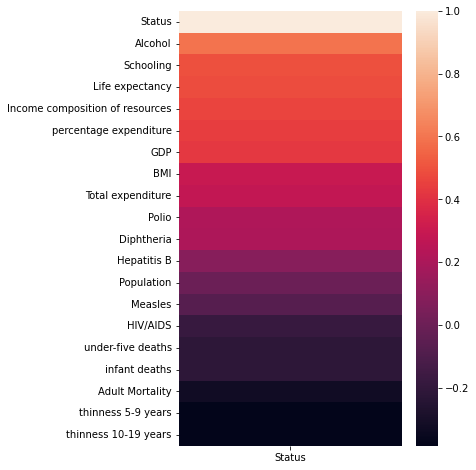

In [13]:
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(data.corr()[["Status"]].sort_values(by="Status",ascending=False))

As seen in the figure, status is mostly correlated with alcohol and schooling. And it is negatively correlated with mostly bad health features like adult mortality, thinness and deaths. So we wanted to examine them further with countplots.

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

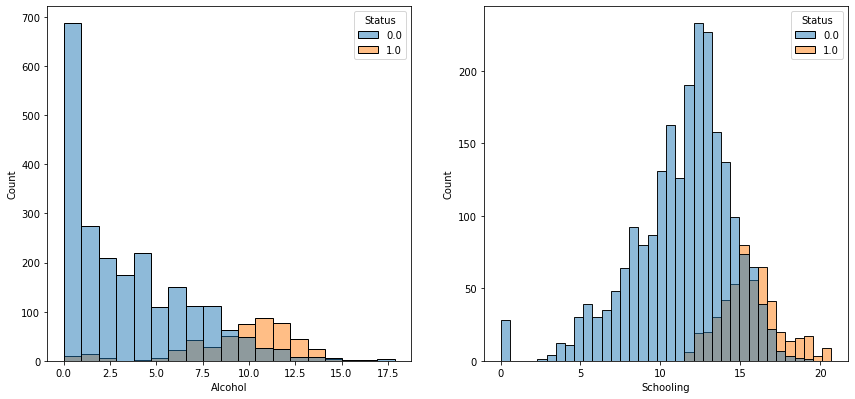

In [14]:
f = plt.figure(figsize = (30,30))
ax=f.add_subplot(4,4,1)
sns.histplot(data=data, x="Alcohol",hue="Status")
ax = f.add_subplot(4,4,2)
sns.histplot(data=data, x="Schooling", hue="Status")

Consumption amount of alcohol or years of schooling does not say that much but if we look at some strict levels we can get some information about countries. For example, if a country never consumes alcohol it is mostly a developing country. Likewise, if there is less than 10 years of schooling in a country, this means it is definitely a developing country.

These were the most positively correlated features. Then, we looked at negative correlations.

<AxesSubplot:xlabel='thinness 10-19 years', ylabel='Count'>

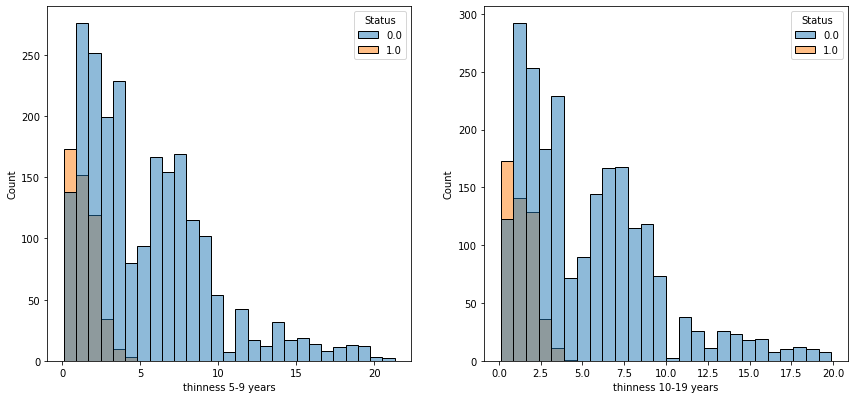

In [15]:
f = plt.figure(figsize = (30,30))
ax=f.add_subplot(4,4,1)
sns.histplot(data=data, x="thinness 5-9 years",hue="Status")
ax = f.add_subplot(4,4,2)
sns.histplot(data=data, x="thinness 10-19 years", hue="Status")

Similar to the previous results, amounts don't show significant results but boundaries do. For both of the plots, if a country have thinness among children more than 5%, it is a developing country.

### Clustering

For the clusterig analysis, we wanted to look at if there are sigificant clusters in the data. But; since status is a binary feature, plots of it would not be clear. So we take the most positively correlated features with status which were alcohol consumption and years of schooling. Alcohol consumption plots were not clear and promising, so we continued with years of schooling over other features.

In [16]:
data.columns

Index(['Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

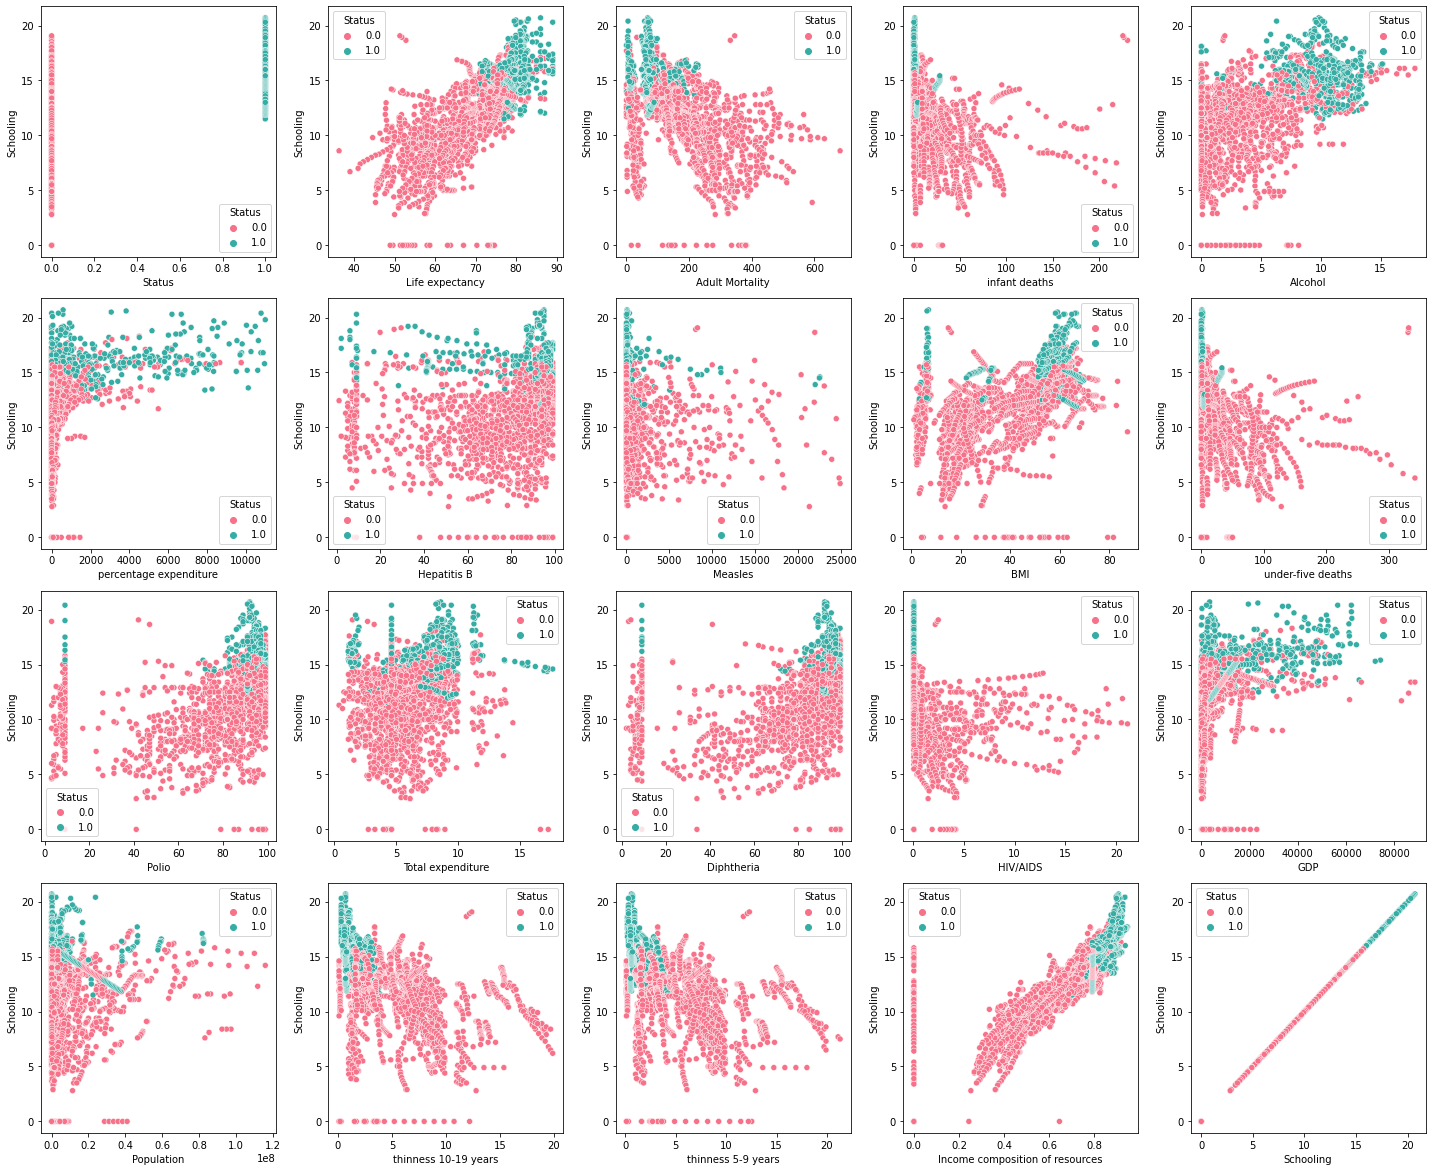

In [17]:
f=plt.figure(figsize=(20,20))
scatter_cols = ['Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i, col in enumerate(scatter_cols):
    ax = f.add_subplot(5,5,i+1)
    sns.scatterplot(data=data, y="Schooling",x=col,palette="husl",hue="Status")
    plt.xlabel(col)
f.tight_layout()

In some cases it can be seen there are clear clusters, for example Polio, Life Expectancy and Income composition. 

These plots show us what clustering analysis should yield.

After them we continued with the actual clustering model.

In [18]:
#imported k-means for clustering analysis.
#reason behind that was clusters were more circular rather than "blobby".
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

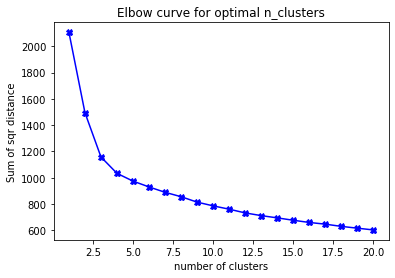

In [19]:
sum_of_squared_distance = []

K = range(1,21)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    sum_of_squared_distance.append(km.inertia_)

plt.plot(K,sum_of_squared_distance,"bX-")
plt.xlabel("number of clusters")
plt.ylabel("Sum of sqr distance")
plt.title("Elbow curve for optimal n_clusters")
plt.show()

We can select 3 as our cluster number.

This result was actually interesting; because rather than classifying countries binarily elbow method yielded 3 clusters, which can also be labeled as not developed, developing and developed.

In [20]:
km = KMeans(n_clusters=3)
km.fit(scaled_data)

data["km_label"] = km.labels_

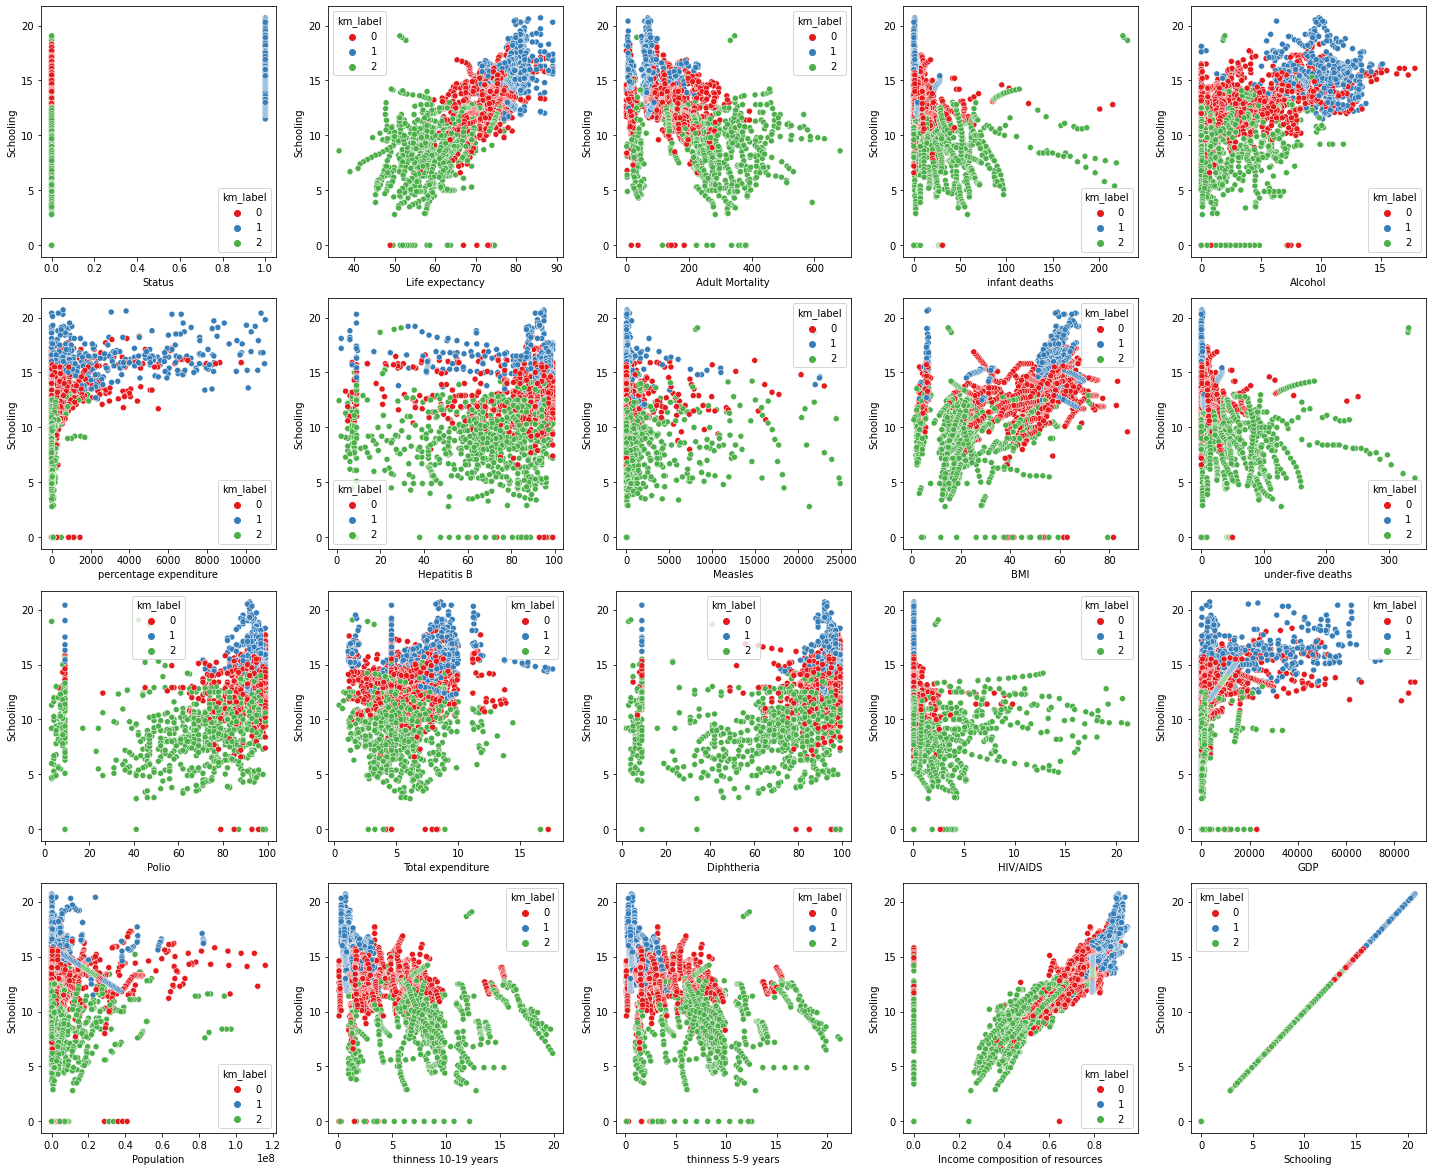

In [21]:
f=plt.figure(figsize=(20,20))
scatter_cols = ['Status', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness 10-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

for i, col in enumerate(scatter_cols):
    ax = f.add_subplot(5,5,i+1)
    sns.scatterplot(data=data, y="Schooling",x=col,palette="Set1",hue="km_label")
    plt.xlabel(col)
f.tight_layout()

Clustering results are very promising. KMeans label_1 can be easily said developed countries. With this results we can continue with Classification.

# Classification


We decided to use KNN Classification and Logistic regression Classifier for this project. Later, we will compare their results.

**KNN Classification**

In [22]:
#seperating independent and dependent variables
#and dropping the km_labels from clustering analysis
X = data.drop(['Status','km_label'], axis=1)
y = data['Status']
X.shape, y.shape

((2729, 19), (2729,))

In [23]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 60:20:20 for train:valid:test dataset
train_size=0.6

# In the first step we will split the data in training and remaining dataset
train_X, rem_X, train_y, rem_y = train_test_split(x_scaled,y, train_size=0.6,random_state=0,shuffle=True)

# Now since we want the valid and test size to be equal (20% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
val_X, test_X, val_y, test_y = train_test_split(rem_X,rem_y, test_size=0.5,random_state=0,shuffle=True)

In [25]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score
# Elbow for Classifier
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_X, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(val_X)
        tmp = f1_score(tmp,val_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

Text(0.5, 1.0, 'Elbow Curve for test')

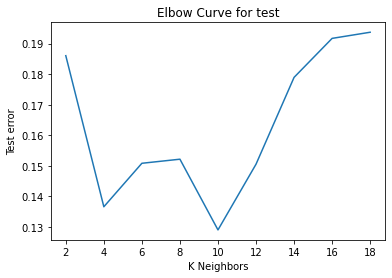

In [26]:
#Defining K range
k = range(2, 20, 2)
# calling above defined function
elbow_test = Elbow(k)
# plotting the Curves
plt.plot(k, elbow_test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

We selected number of neighbors as 10

In [27]:
from sklearn.metrics import accuracy_score
# Creating instance of KNN
knn_model = KNN(n_neighbors = 10)

# Fitting the model
knn_model.fit(train_X, train_y)
predictions = knn_model.predict(val_X)
knn_accuracy = accuracy_score(val_y, predictions)
print(knn_accuracy)
print("Accuracy score of knn_model : ", knn_accuracy)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

0.9560439560439561
Accuracy score of knn_model :  0.9560439560439561
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       449
         1.0       0.91      0.84      0.87        97

    accuracy                           0.96       546
   macro avg       0.94      0.91      0.92       546
weighted avg       0.96      0.96      0.96       546



As seen in the classification report of KNN model, results are highly accurate to real values. Because developed countries were small portion of the whole dataset, recall of 1.0 was highly important for us and results are promising for KNN.

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# Cross Validation  
scores = cross_val_score(knn_model, X, y, cv=10)
scores.sort()
cross_val_score_knn = scores.mean()
print(scores)
print("Cross validation score of knn_model : ", cross_val_score_knn)

[0.78388278 0.78388278 0.7985348  0.7985348  0.8021978  0.8021978
 0.80586081 0.8125     0.81318681 0.81684982]
Cross validation score of knn_model :  0.8017628205128207


In [29]:
# Making Predictions on Test data
knn_predictions_test = knn_model.predict(test_X)
knn_test = pd.DataFrame({'Real Status' : test_y,
                              'Prediction Status':knn_predictions_test})
knn_test.head(10)

,Real Status,Prediction Status
469,0.0,0.0
2037,0.0,0.0
2332,1.0,1.0
2422,0.0,0.0
2763,1.0,1.0
1853,1.0,1.0
98,0.0,0.0
682,1.0,1.0
1927,0.0,0.0
610,0.0,0.0


**Logistic Regression**

In [30]:
# Making predictions and measuring accuracy
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)
predictions = lr_model.predict(val_X)
lr_accuracy = accuracy_score(val_y, predictions)
print(lr_accuracy)
print("Accuracy score of lr_model : ", lr_accuracy)
print(classification_report(val_y,predictions))

0.9358974358974359
Accuracy score of lr_model :  0.9358974358974359
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       449
         1.0       0.83      0.80      0.82        97

    accuracy                           0.94       546
   macro avg       0.89      0.88      0.89       546
weighted avg       0.94      0.94      0.94       546



Here is the classification report of Logistic regression classifier. Results are similar to the KNN classification. But LR is worse than KNN on recall.

In [31]:
# Cross Validation  

scores = cross_val_score(lr_model, X, y, cv=10)
scores.sort()
cross_val_score_lr = scores.mean()
print(scores)
print("Cross validation score of knn_model : ", cross_val_score_lr)

[0.78021978 0.80952381 0.82783883 0.83516484 0.83823529 0.83882784
 0.83882784 0.87179487 0.87545788 0.87912088]
Cross validation score of knn_model :  0.8395011850894205


In [32]:
# Making Predictions on Test data
lr_predictions_test = lr_model.predict(test_X)
lr_test = pd.DataFrame({'Real Status' : test_y,
                              'Prediction Status':lr_predictions_test})
lr_test.head(10)

,Real Status,Prediction Status
469,0.0,0.0
2037,0.0,0.0
2332,1.0,1.0
2422,0.0,0.0
2763,1.0,1.0
1853,1.0,1.0
98,0.0,0.0
682,1.0,1.0
1927,0.0,0.0
610,0.0,0.0


## Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Logistic Reg Accuracy score: 0.94')

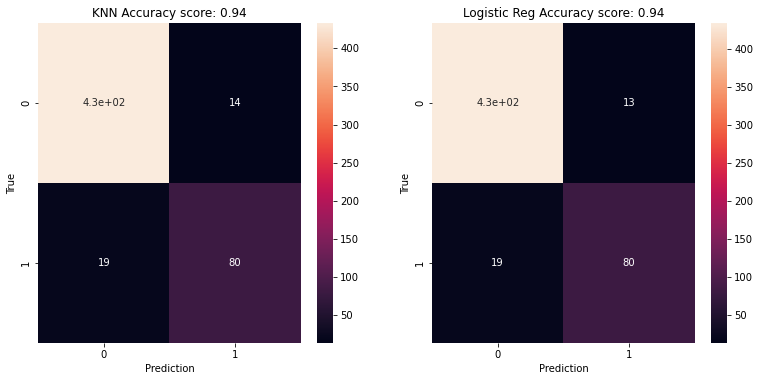

In [34]:
f = plt.figure(figsize = (20,20))

ax=f.add_subplot(3,3,1)
cm = confusion_matrix(test_y, knn_predictions_test)
sns.heatmap(cm,annot = True)
plt.ylabel("True")
plt.xlabel("Prediction")
title = "KNN Accuracy score: {:.2f}".format(lr_accuracy)
plt.title(title)

ax=f.add_subplot(3,3,2)
cm = confusion_matrix(test_y, lr_predictions_test)
sns.heatmap(cm,annot = True)
plt.ylabel("True")
plt.xlabel("Prediction")
title = "Logistic Reg Accuracy score: {:.2f}".format(lr_accuracy)
plt.title(title)

We can not say much from the confusion matrices because results of both models are almost the same.

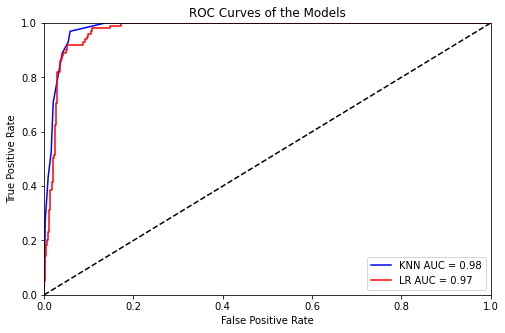

In [35]:
knn_y_scores = knn_model.predict_proba(test_X)
knn_fpr, knn_tpr, threshold = roc_curve(test_y, knn_y_scores[:, 1])
knn_roc_auc = auc(knn_fpr, knn_tpr)

lr_y_scores = lr_model.predict_proba(test_X)
lr_fpr, lr_tpr, threshold = roc_curve(test_y, lr_y_scores[:, 1])
lr_roc_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(8,5))
plt.title('Receiver Operating Characteristic')
plt.plot(knn_fpr, knn_tpr, 'b', label = 'KNN AUC = %0.2f' % knn_roc_auc)
plt.plot(lr_fpr, lr_tpr, 'r', label = 'LR AUC = %0.2f' % lr_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves of the Models')
plt.show()

We plotted both of the ROC curves of models. As seen in the figure KNN model is slightly better from the Logistic regression classifier.

For the final desicion, we mostly considered accuracy and recall of developed countries. As we discussed on the classification reports 

KNN recall = 0.84

LR recall = 0.80

And also KNN's accuracy is higher than LR on normal tests.

As a result, although Logistic regression classifier gave better results on cross validation score we think **KNN classification** is the better model for this case.